In [69]:
import numpy as np
from navigation import *

In [70]:
# blur = [gaussian_blur((17,17),7)]
# threshold = [adaptive_threshold(81, 5),
#              morph_close(kernel(9)),
#              morph_dilate(kernel(5), 2)]
# grid_size = 15

navigation = Indoor_Navigation('static/floor_plan_1.jpg',
                               'Demo floor plan',
                               grid_size=10)
navigation.save('static/navigation.pkl')

Number of doors: 4


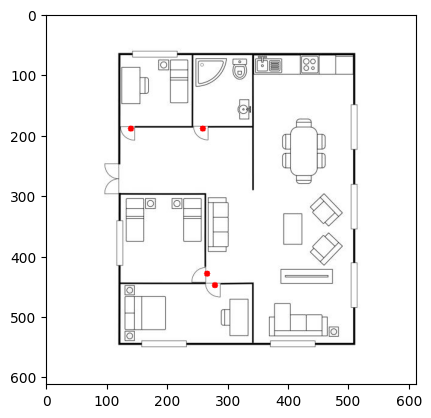

In [80]:
threshold = [morph_close(kernel(3)),
             morph_open(kernel(80)),
             adaptive_threshold(21, 51),
             morph_open(kernel(3)),
             morph_close(kernel(20)),
             morph_dilate(kernel(5)),
             ]
mask = apply_filters(navigation.image, threshold)


threshold = [gaussian_blur((17, 17), 7),
             adaptive_threshold(81, 5),
             morph_open(kernel(15)),
             morph_close(kernel(18)),
             ]
image_thresh = apply_filters(navigation.image, threshold)

# put the mask on the original image
doors_closed = cv2.bitwise_and(image_thresh, mask)

filters = [morph_close(kernel(22)),
          ]
doors_open = apply_filters(doors_closed, filters)

doors = cv2.bitwise_xor(doors_closed, doors_open)

filters = [morph_open(kernel(3)),
           #morph_dilate(kernel(5))
          ]
doors = apply_filters(doors, filters)

door_contours, _ = cv2.findContours(doors, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('Number of doors:', len(door_contours))

# filters = [morph_erode(kernel(5))]
# mask = apply_filters(mask, filters)

filters = [invert]
mask2 = apply_filters(doors, filters)

filters = [morph_dilate(kernel(10))]
mask = apply_filters(mask, filters)

im = cv2.bitwise_and(mask, mask2)

# plt.imshow(im, cmap='gray')
# plt.show()

# get the center of each door
door_centers = []
for door in door_contours:
    x, y, w, h = cv2.boundingRect(door)
    door_centers.append((x + w // 2, y + h // 2))

# plot the points on the image
image = cv2.cvtColor(navigation.image, cv2.COLOR_GRAY2RGB)
for center in door_centers:
    cv2.circle(image, center, 5, (255, 0, 0), -1)
plt.imshow(image)

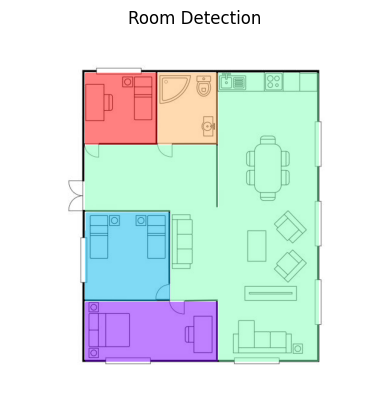

In [72]:
navigation.plot_rooms()

In [73]:
navigation = Indoor_Navigation('static/floor_plan_1.jpg',
                               'Demo floor plan',
                               grid_size=10)

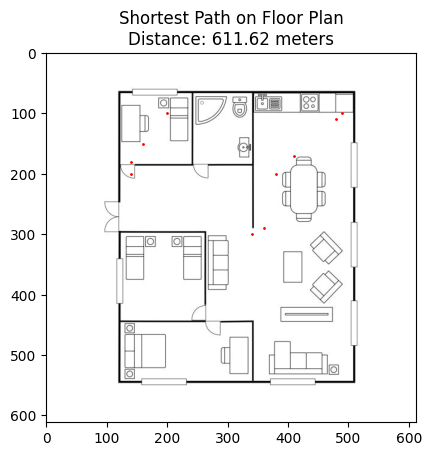

In [74]:
navigation.calculate_and_plot_route((200, 100), (500, 100), in_pixels=True)

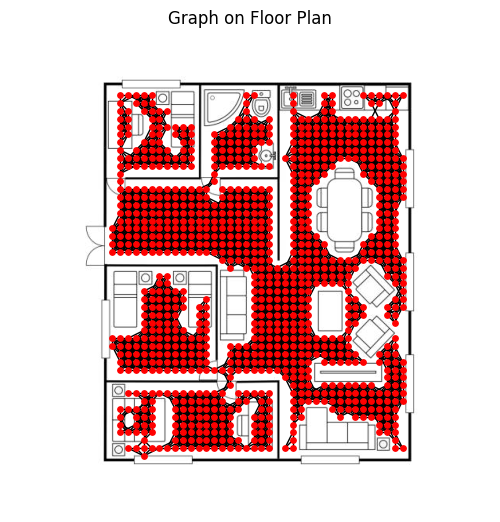

In [75]:
navigation.plot_graph()

In [76]:
navigation.save('static/navigation.pkl')